In [1]:
!pip install torch torchaudio torchvision mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23

In [2]:
!pip install dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: graphql-core
    Found existing installation: graphql-core 3.2.6
    Uninstalling graphql-core-3.2.6:
      Successfully uninstalled graphql-core-3.2.6


In [9]:
import os
import json

# Load token from JSON
with open('/content/youtube_dagshub.json', 'r') as f:
    youtube_dagshub_token = json.load(f)

# Set environment variable
os.environ["DAGSHUB_TOKEN"] = youtube_dagshub_token["youtube_dagshub"]


In [11]:
import mlflow
import dagshub
import json

# Load JSON from file
with open('/content/youtube_dagshub.json', 'r', encoding='utf-8') as f:
    token = json.load(f)

DAGSHUB_USER="Prayesh13"
DAGSHUB_REPO="youtube-comments-analysis"


mlflow.set_tracking_uri(f"https://dagshub.com/{DAGSHUB_USER}/{DAGSHUB_REPO}.mlflow")
dagshub.auth.add_app_token(token['youtube_dagshub'])
dagshub.init(repo_owner='Prayesh13', repo_name='youtube-comments-analysis', mlflow=True, )

with mlflow.start_run() as run:
    # Log a parameter (key-value pair)
    mlflow.log_param("param1", 5)

    # Log a metric; metrics can be updated throughout the run
    mlflow.log_metric("metric1", 0.91)

Accessing as Prayesh13

Initialized MLflow to track repo "Prayesh13/youtube-comments-analysis"

Repository Prayesh13/youtube-comments-analysis initialized!

🏃 View run sedate-snake-961 at: https://dagshub.com/Prayesh13/youtube-comments-analysis.mlflow/#/experiments/0/runs/e37167b4a1f04d3ab333f841039fdad5
🧪 View experiment at: https://dagshub.com/Prayesh13/youtube-comments-analysis.mlflow/#/experiments/0


## Baseline Model

In [12]:
import numpy as np
import pandas as pd
import os

import mlflow
import mlflow.sklearn
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Step 1: Load the Processed dataset

train_df = pd.read_csv("/content/train_processed.csv")
test_df = pd.read_csv("/content/test_processed.csv")

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 2: Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [ ]:
X_train_trans = vectorizer.fit_transform(train_df['content'])
y_train = train_df['label']

In [ ]:
X_test_trans = vectorizer.transform(test_df['content'])
y_test = test_df['label']

In [ ]:
mlflow.set_experiment("RF Baseline")

2025/04/16 10:38:17 INFO mlflow.tracking.fluent: Experiment with name 'RF Baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/50d044c12c1f4a1b84846b4de74b3ee1', creation_time=1744780097271, experiment_id='1', last_update_time=1744780097271, lifecycle_stage='active', name='RF Baseline', tags={}>

2025/04/16 11:12:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Baseline_TrainTestSplit at: https://dagshub.com/Prayesh13/youtube-comments-analysis.mlflow/#/experiments/1/runs/743b989bee2a47fe811290ffb7650a90
🧪 View experiment at: https://dagshub.com/Prayesh13/youtube-comments-analysis.mlflow/#/experiments/1
Accuracy: 0.44118900223063234


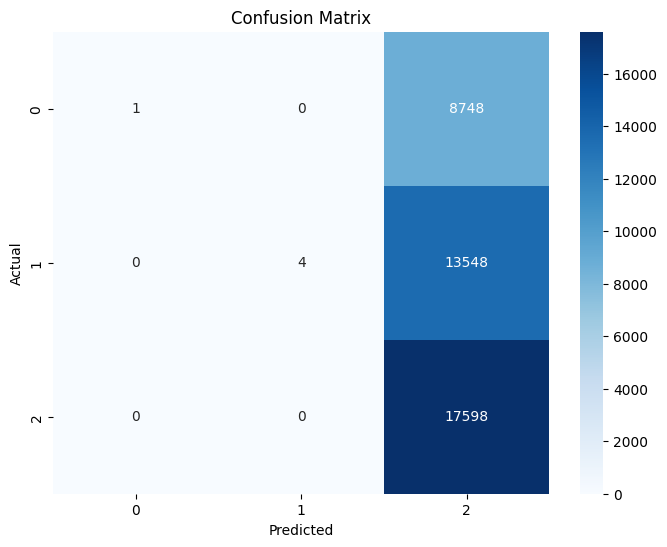

In [ ]:
with mlflow.start_run() as run:
    # Log the discription for the run
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.log_param("model_type", "RandomForestClassifier")

    # Add a discription
    mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (BoW) with a simple train-test split")

    # Log the parameters for the vectorizer
    mlflow.log_param("vectorizer_type", "TfidfVectorizer")
    mlflow.log_param("max_features", vectorizer.max_features)

    # Log random forest parameters
    n_estimators = 250
    max_depth = 10
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train_trans, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_trans)

    # Log metrics for each class and accuracy
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):  # For precision, recall, f1-score, etc.
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Save and log the confusion matrix plot
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Log the Random Forest model
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Log datasets
    train_path = os.path.join(path, "train_processed.csv")
    test_path = os.path.join(path, "test_processed.csv")

    # Log artifacts to a folder named 'datasets' inside MLflow
    mlflow.log_artifact(train_path, artifact_path="datasets")
    mlflow.log_artifact(test_path, artifact_path="datasets")

# Display final accuracy
print(f"Accuracy: {accuracy}")

In [ ]:
print(classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))

              precision    recall  f1-score   support

    Negative       1.00      0.00      0.00      8749
     Neutral       1.00      0.00      0.00     13552
    Positive       0.44      1.00      0.61     17598

    accuracy                           0.44     39899
   macro avg       0.81      0.33      0.20     39899
weighted avg       0.75      0.44      0.27     39899



### Apply Deep Learning to this dataset

In [14]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
X_train = train_df['content']
y_train = train_df['label'].astype('category').cat.codes
X_test = test_df['content']
y_test = test_df['label'].astype('category').cat.codes

In [16]:
import re
from collections import Counter

# Custom tokenizer using regex (no downloads required)
def tokenizer(text):
    return re.findall(r'\b\w+\b', text.lower())

# Build vocabulary manually
def build_vocab(texts, min_freq=1):
    counter = Counter()
    for text in texts:
        counter.update(tokenizer(text))
    vocab = {"<unk>": 0, "<pad>": 1}
    for word, freq in counter.items():
        if freq >= min_freq:
            vocab[word] = len(vocab)
    return vocab

# Usage
print("Building vocabulary...")
vocab = build_vocab(X_train)
print(f"Vocabulary size: {len(vocab)}")


Building vocabulary...
Vocabulary size: 102963


In [17]:
mlflow.set_experiment("LSTM_Text_Classification")

2025/04/16 14:39:07 INFO mlflow.tracking.fluent: Experiment with name 'LSTM_Text_Classification' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/02ca759d4d84448baac8a9432ef1b410', creation_time=1744814347543, experiment_id='2', last_update_time=1744814347543, lifecycle_stage='active', name='LSTM_Text_Classification', tags={}>

In [18]:
# Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, tokenizer, max_len=100):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        tokens = self.tokenizer(self.texts[idx])
        ids = [self.vocab.get(token, self.vocab["<unk>"]) for token in tokens][:self.max_len]
        ids += [self.vocab["<pad>"]] * (self.max_len - len(ids))
        return torch.tensor(ids), torch.tensor(self.labels[idx])

# DataLoader
print("Preparing DataLoaders...")
train_dataset = TextDataset(X_train.tolist(), y_train.tolist(), vocab, tokenizer)
test_dataset = TextDataset(X_test.tolist(), y_test.tolist(), vocab, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

Preparing DataLoaders...


In [19]:
# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=vocab["<pad>"])
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        return self.fc(hidden[-1])

# Model setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_size = len(vocab)
embed_dim = 100
hidden_dim = 128
output_dim = y_train.nunique()

model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
with mlflow.start_run():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    vocab_size = len(vocab)
    embed_dim = 100
    hidden_dim = 128
    output_dim = y_train.nunique()

    model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Log hyperparameters
    mlflow.log_param("vocab_size", vocab_size)
    mlflow.log_param("embed_dim", embed_dim)
    mlflow.log_param("hidden_dim", hidden_dim)
    mlflow.log_param("output_dim", output_dim)
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("learning_rate", 0.001)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 5)

    print("Starting training...\n")
    for epoch in range(1, 6):
        model.train()
        total_loss = 0
        batch_count = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            batch_count += 1
        avg_loss = total_loss / batch_count
        print(f"Epoch {epoch} Completed | Avg Loss: {avg_loss:.4f}")
        mlflow.log_metric("train_loss", avg_loss, step=epoch)

    print("Starting evaluation...\n")
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for i, (X_batch, y_batch) in enumerate(test_loader):
            X_batch = X_batch.to(device)
            output = model(X_batch)
            preds = torch.argmax(output, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(y_batch.numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"\nTest Accuracy: {accuracy:.4f}")
    mlflow.log_metric("test_accuracy", accuracy)

    # Save and log model
    mlflow.pytorch.log_model(model, "models/lstm_model")

Starting training...

Epoch 1 Completed | Avg Loss: 0.9710
Epoch 2 Completed | Avg Loss: 0.4554
Epoch 3 Completed | Avg Loss: 0.3215
Epoch 4 Completed | Avg Loss: 0.2488
Epoch 5 Completed | Avg Loss: 0.1964
Starting evaluation...


Test Accuracy: 0.8790


2025/04/16 14:44:33 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu124) contains a local version label (+cu124). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/04/16 14:44:43 WARNING mlflow.utils.requirements_utils: Found torch version (2.6.0+cu124) contains a local version label (+cu124). MLflow logged a pip requirement for this package as 'torch==2.6.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/04/16 14:44:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run unique-lynx-740 at: https://dagshub.com/Prayesh13/youtube-comments-analysis.mlflow/#/experiments/2/runs/cf621c8b9b824bad925e4432691d88f4
🧪 View experiment at: https://dagshub.com/Prayesh13/youtube-comments-analysis.mlflow/#/experiments/2
